In [175]:
# 기본
import os
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib 
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from datetime import datetime as dt

# 회귀분석
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [176]:
data_dir='C:/Users/KimMinyoung/desktop/깃헙관련/빅콘git/data/total'
data_list = os.listdir(data_dir)
#print(len(data_list))
#print(data_list)

In [177]:
#년도별 저장
data_list_2016 = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-1].startswith('2016') ]
data_2016 = [pd.read_csv(os.path.join(data_dir,data_list_2016[x]),encoding='cp949') for x in range(len(data_list_2016))]
data_list_2017 = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-1].startswith('2017') ]
data_2017 = [pd.read_csv(os.path.join(data_dir,data_list_2017[x]),encoding='cp949') for x in range(len(data_list_2017))]
data_list_2018 = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-1].startswith('2018') ]
data_2018 = [pd.read_csv(os.path.join(data_dir,data_list_2018[x]),encoding='cp949') for x in range(len(data_list_2018))]
data_list_2019 = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-1].startswith('2019') ]
data_2019 = [pd.read_csv(os.path.join(data_dir,data_list_2019[x]),encoding='cp949') for x in range(len(data_list_2019))]
data_list_2020 = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-1].startswith('2020') ]
data_2020 = [pd.read_csv(os.path.join(data_dir,data_list_2020[x]),encoding='cp949') for x in range(len(data_list_2020))]
#print('2020년 데이터: \n', data_2020)

#항목별 저장
data_list_single_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인타자')]
data_single_hitter = [pd.read_csv(os.path.join(data_dir, data_list_single_hitter[x]), encoding='cp949') for x in range(len(data_list_single_hitter))]
data_list_single_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인투수')]
data_single_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_single_pitcher[x]), encoding='cp949') for x in range(len(data_list_single_pitcher))]
data_list_games = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('경기')]
data_games = [pd.read_csv(os.path.join(data_dir, data_list_games[x]), encoding='cp949') for x in range(len(data_list_games))]
data_list_player_enroll = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('등록선수')]
data_player_enroll = [pd.read_csv(os.path.join(data_dir, data_list_player_enroll[x]), encoding='cp949') for x in range(len(data_list_player_enroll))]
data_list_players = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('선수')]
data_players = [pd.read_csv(os.path.join(data_dir, data_list_players[x]), encoding='cp949') for x in range(len(data_list_players))]
data_list_teams = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀')]
data_teams = [pd.read_csv(os.path.join(data_dir, data_list_teams[x]), encoding='cp949') for x in range(len(data_list_teams))]
data_list_team_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀타자')]
data_team_hitter = [pd.read_csv(os.path.join(data_dir, data_list_team_hitter[x]), encoding='cp949') for x in range(len(data_list_team_hitter))]
data_list_team_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀투수')]
data_team_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_team_pitcher[x]), encoding='cp949') for x in range(len(data_list_team_pitcher))]
#print('팀투수 데이터:\n', data_team_pitcher)

In [178]:
from sklearn.preprocessing import LabelEncoder

def team_pitcher_eda(year, team_name):
    year_index = year - 2016 
    
    # team_pitcher data에 해당 경기의 해당 팀의 홈 어웨이 여부 column 추가
    data_games_year = data_games[year_index]
    data_games_year = data_games_year[['G_ID', 'VISIT_KEY', 'HOME_KEY']]
    data_games_year = data_games_year.set_index('G_ID')
    
    data_team_pitcher_year = data_team_pitcher[year_index]
    data_team_pitcher_year = pd.merge(data_team_pitcher_year, data_games_year, how='left', on=['G_ID'])

    data_team_pitcher_year_team = data_team_pitcher_year[data_team_pitcher_year.T_ID == team_name]
    df = data_team_pitcher_year_team
    df['HOME_KEY'] = df['HOME_KEY'].map(lambda x: 1 if x == team_name else 0 )
    df = df.drop(columns = ['VISIT_KEY', 'GDAY_DS'])
    
    # LabelEncoding
    encoder = LabelEncoder()

    df['VS_T_ID'] = encoder.fit_transform(df['VS_T_ID']) #상대편
    df['TB_SC'] = encoder.fit_transform(df['TB_SC']) #이닝 초/말
    df['WLS'] = encoder.fit_transform(df['WLS']) #승패무 여부
    
    
    ### 이부분은 모든 EDA에서 동일하게 작성
    
    df['H1']=df['HIT']-df['H2']-df['H3']-df['HR']

    #df['G_ID'] = pd.Series(dt)
    df['year']=df['G_ID'].str.slice(0,4).astype(int)
    df['month']=df['G_ID'].str.slice(4,6).astype(int)
    
    df["FIP"] = ((13*df.HR+3*(df.BB+df.HP-df.IB)-2*df.KK)/(df.INN2/3)) +3.2
    df["BABIP"] = (df.HIT-df.HR)/(df.AB-df.KK-df.HR+df.SF)
    df['SLG']=(df['HIT']+df['HP']+df['BB'])/(df['AB']+df['BB']+df['HP']+df['SF'])
    df['OBA']=(df['H1']+2*df['H2']+3*df['H3']+4*df['HR'])/df['AB']
    df['W_OPS']=0.57* df['SLG']+0.43*df['OBA']

    # 시계열 데이터(경기당 방어율 계산)이기 때문에 경기 코드를 index로
    df = df.set_index('G_ID')

    # 경기당 방어율 column 생성
    df['ERA'] = df['ER'] * 27 / df['INN2']

    df = df.drop(columns=['T_ID'])
    df_year_team_name = df
    
    return df_year_team_name

In [179]:
df_2016_LG = team_pitcher_eda(2016,'LG')
df_2017_LG = team_pitcher_eda(2017,'LG')
df_2018_LG = team_pitcher_eda(2018,'LG')
df_2019_LG = team_pitcher_eda(2019,'LG')
df_2020_LG = team_pitcher_eda(2020,'LG')

In [180]:
df_all_LG = pd.concat([df_2016_LG,df_2017_LG,df_2018_LG,df_2019_LG,df_2020_LG])
df_all_LG =df_all_LG.reset_index()

In [181]:
# Regressor에는 datatime을 사용할 수 없으므로 year, month를 생성함

In [182]:
#year = df_all_LG['G_ID'].str.slice(0,4).astype(int)
#month = df_all_LG['G_ID'].str.slice(4,6).astype(int)
#df_all_LG['year']=year
#df_all_LG['month']=month

In [183]:
df_all_LG

,G_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,PA,...,HOME_KEY,H1,year,month,FIP,BABIP,SLG,OBA,W_OPS,ERA
0,20160401HHLG0,0,0,0,0,2,0,36,184,52,...,1,11,2016,4,2.283333,0.361111,0.326531,0.326087,0.326340,3.000000
1,20160402HHLG0,0,0,0,0,2,2,33,176,50,...,1,9,2016,4,2.654545,0.382353,0.375000,0.395349,0.383750,5.727273
2,20160405LGHT0,1,0,1,0,1,0,24,123,31,...,0,4,2016,4,3.450000,0.294118,0.290323,0.357143,0.319055,2.250000
3,20160407LGHT0,1,0,1,0,2,2,27,137,37,...,0,4,2016,4,2.866667,0.321429,0.324324,0.411765,0.361924,4.000000
4,20160408LGSK0,6,0,1,0,1,0,29,142,41,...,0,8,2016,4,3.613793,0.242424,0.292683,0.222222,0.262385,0.931034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,20200715LGLT0,3,0,1,0,2,0,27,139,39,...,0,9,2020,7,6.644444,0.333333,0.358974,0.567568,0.448669,3.000000
636,20200716LGLT0,3,0,1,0,1,0,24,142,42,...,0,10,2020,7,5.450000,0.419355,0.404762,0.600000,0.488714,9.000000
637,20200717HHLG0,0,0,0,0,2,0,27,145,32,...,1,2,2020,7,2.200000,0.150000,0.187500,0.137931,0.166185,0.000000
638,20200718HHLG0,0,0,0,0,2,1,27,149,37,...,1,7,2020,7,4.422222,0.266667,0.351351,0.281250,0.321208,1.000000


In [184]:
df_all_LG['ym']=df_all_LG['G_ID'].str.slice(0,6)

a=df_all_LG['ym'].unique()
b=list(range(len(a)))
list_C = [ x for x in zip(a,b) ]
dict1=dict(list_C)
dict1

df_all_LG['dummy']=df_all_LG['ym'].map(dict1)
df_all_LG['dummy+1']=df_all_LG['dummy']+1

y_dict=df_all_LG.groupby(['dummy'])['ERA'].mean().to_dict()
y_dict

df_all_LG['y_next']=df_all_LG['dummy+1'].map(y_dict)
df_all_LG.drop(['dummy','dummy+1','ym'],axis=1,inplace=True)

df_all_LG

,G_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,BF,PA,...,H1,year,month,FIP,BABIP,SLG,OBA,W_OPS,ERA,y_next
0,20160401HHLG0,0,0,0,0,2,0,36,184,52,...,11,2016,4,2.283333,0.361111,0.326531,0.326087,0.326340,3.000000,5.506522
1,20160402HHLG0,0,0,0,0,2,2,33,176,50,...,9,2016,4,2.654545,0.382353,0.375000,0.395349,0.383750,5.727273,5.506522
2,20160405LGHT0,1,0,1,0,1,0,24,123,31,...,4,2016,4,3.450000,0.294118,0.290323,0.357143,0.319055,2.250000,5.506522
3,20160407LGHT0,1,0,1,0,2,2,27,137,37,...,4,2016,4,2.866667,0.321429,0.324324,0.411765,0.361924,4.000000,5.506522
4,20160408LGSK0,6,0,1,0,1,0,29,142,41,...,8,2016,4,3.613793,0.242424,0.292683,0.222222,0.262385,0.931034,5.506522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,20200715LGLT0,3,0,1,0,2,0,27,139,39,...,9,2020,7,6.644444,0.333333,0.358974,0.567568,0.448669,3.000000,NaN
636,20200716LGLT0,3,0,1,0,1,0,24,142,42,...,10,2020,7,5.450000,0.419355,0.404762,0.600000,0.488714,9.000000,NaN
637,20200717HHLG0,0,0,0,0,2,0,27,145,32,...,2,2020,7,2.200000,0.150000,0.187500,0.137931,0.166185,0.000000,NaN
638,20200718HHLG0,0,0,0,0,2,1,27,149,37,...,7,2020,7,4.422222,0.266667,0.351351,0.281250,0.321208,1.000000,NaN


In [185]:
df_all_LG.dropna(inplace=True)#일단 드랍하고 진행

# Modeling

In [186]:
from sklearn.metrics import make_scorer

def mae(prediction, correct):
    prediction = np.array(prediction)
    correct = np.array(correct)
    
    difference = correct - prediction
    abs_val = abs(difference)
    
    score = abs_val.mean()
    
    return score

mae_scorer = make_scorer(mae)
mae_scorer
def mse(prediction, correct):
    prediction = np.array(prediction)
    correct = np.array(correct)
    
    difference = correct - prediction
    sqr_val = difference ** 2
    
    score = sqr_val.mean()
    
    return score

mse_scorer = make_scorer(mse)
mse_scorer

def plot_train_test_pred_graph(trainset, testset, pred):
    plt.figure(figsize=(15,3))
    plt.plot(trainset.ERA, label='train')
    plt.plot(testset.ERA, label='test')
    plt.plot(testset.index, pred, label='prediction')
    plt.legend()
    plt.show()

In [187]:
df_all_LG=df_all_LG.drop(['G_ID','ERA'],axis=1)

In [188]:
train=df_all_LG.iloc[:200]
valid=df_all_LG.iloc[200:300]
test=df_all_LG.iloc[300:]

X_train,y_train=train.drop(['y_next'],axis=1),train['y_next']
X_valid,y_valid=valid.drop(['y_next'],axis=1),valid['y_next']
X_test,y_test=test.drop(['y_next'],axis=1),test['y_next']

In [189]:
model = LGBMRegressor()
model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)],
             eval_metric='rmse')

[1]	training's rmse: 0.9046	training's l2: 0.818302	valid_1's rmse: 0.823249	valid_1's l2: 0.677739
[2]	training's rmse: 0.84874	training's l2: 0.72036	valid_1's rmse: 0.853647	valid_1's l2: 0.728713
[3]	training's rmse: 0.800177	training's l2: 0.640283	valid_1's rmse: 0.880044	valid_1's l2: 0.774478
[4]	training's rmse: 0.758565	training's l2: 0.575421	valid_1's rmse: 0.90658	valid_1's l2: 0.821888
[5]	training's rmse: 0.7227	training's l2: 0.522295	valid_1's rmse: 0.935937	valid_1's l2: 0.875978
[6]	training's rmse: 0.692234	training's l2: 0.479187	valid_1's rmse: 0.951626	valid_1's l2: 0.905592
[7]	training's rmse: 0.666217	training's l2: 0.443845	valid_1's rmse: 0.974787	valid_1's l2: 0.950209
[8]	training's rmse: 0.644064	training's l2: 0.414819	valid_1's rmse: 0.99959	valid_1's l2: 0.99918
[9]	training's rmse: 0.625212	training's l2: 0.39089	valid_1's rmse: 1.02195	valid_1's l2: 1.04438
[10]	training's rmse: 0.609097	training's l2: 0.371	valid_1's rmse: 1.03609	valid_1's l2: 1.07

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [190]:
model = LGBMRegressor()
model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)],
             eval_metric='mae')

[1]	training's l1: 0.674399	training's l2: 0.818302	valid_1's l1: 0.631935	valid_1's l2: 0.677739
[2]	training's l1: 0.62572	training's l2: 0.72036	valid_1's l1: 0.626784	valid_1's l2: 0.728713
[3]	training's l1: 0.582423	training's l2: 0.640283	valid_1's l1: 0.633453	valid_1's l2: 0.774478
[4]	training's l1: 0.543455	training's l2: 0.575421	valid_1's l1: 0.651719	valid_1's l2: 0.821888
[5]	training's l1: 0.507618	training's l2: 0.522295	valid_1's l1: 0.675571	valid_1's l2: 0.875978
[6]	training's l1: 0.472153	training's l2: 0.479187	valid_1's l1: 0.692762	valid_1's l2: 0.905592
[7]	training's l1: 0.443524	training's l2: 0.443845	valid_1's l1: 0.713122	valid_1's l2: 0.950209
[8]	training's l1: 0.417103	training's l2: 0.414819	valid_1's l1: 0.733268	valid_1's l2: 0.99918
[9]	training's l1: 0.394817	training's l2: 0.39089	valid_1's l1: 0.750555	valid_1's l2: 1.04438
[10]	training's l1: 0.374377	training's l2: 0.371	valid_1's l1: 0.760208	valid_1's l2: 1.07348
[11]	training's l1: 0.354753

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [191]:
def predict_columns(data_frame, x_cols, y_col):
    size = int(len(data_frame) * 0.7)
    train = data_frame[:size]
    test = data_frame[size:]
    
    reg_models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), GradientBoostingRegressor(), SVR(), XGBRegressor(), LGBMRegressor()]
    reg_model_names = ["LinearRegression", "Ridge", "Lasso", "ElasticNet", "GradientBoositng", " SupportVector", "XGBoost","lgbm"]

    for i in range(len(reg_models)):
        reg = reg_models[i].fit(train[x_cols], train[y_col])
        pred = reg_models[i].predict(test[x_cols])
        print('{} : {}'.format(reg_model_names[i], mae(test[y_col], pred.astype(int))))
        #print(pred)

In [192]:
predict_columns(df_all_LG, ['year', 'month'], 'y_next')

LinearRegression : 0.6741098096678316
Ridge : 0.6741098096678316
Lasso : 0.6741098096678316
ElasticNet : 0.6741098096678316
GradientBoositng : 0.9882488984089616
 SupportVector : 0.6741098096678316
XGBoost : 1.1330934155939039
lgbm : 1.1426377880493015


In [193]:
reg_x = df_all_LG.drop(['y_next'], axis=1)
reg_y = df_all_LG['y_next']

In [194]:
cv = KFold(10, shuffle=True, random_state=0)

In [195]:
size = int(len(df_all_LG) * 0.7)
train = df_all_LG[:size]
test = df_all_LG[size:]

reg_models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), GradientBoostingRegressor(), SVR(), XGBRegressor(),LGBMRegressor()]
reg_model_names = ["LinearRegression", "Ridge", "Lasso", "ElasticNet", "GradientBoositng", " SupportVector", "XGBoost","lgbm"]
for i in range(len(reg_models)):
    full_cols = -cross_val_score(reg_models[i], reg_x, reg_y, scoring="neg_mean_absolute_error", cv=cv)
    certain_cols = -cross_val_score(reg_models[i], reg_x[['year', 'month']], reg_y, scoring="neg_mean_absolute_error", cv=cv)
    
    print("{} :{}".format(reg_model_names[i], certain_cols.mean()))

LinearRegression :0.8154000947654048
Ridge :0.8154136306634004
Lasso :0.8410076805106096
ElasticNet :0.8410076805106096
GradientBoositng :0.216829657623768
 SupportVector :0.8427029113780667
XGBoost :0.000773530890605643
lgbm :0.15053343925391333


In [ ]:
# 데이터가 작아 오버피팅 가능성

# 파라미터 변경하면서 튜닝중.. + 피처 IMPORTANCE 확인

In [196]:
cat_features = ['VS_T_ID' ,'HEADER_NO', 'TB_SC' ]
df_all_LG[cat_features] = df_all_LG[cat_features].astype('category')

X = df_all_LG.drop(columns = ['y_next'])
y = df_all_LG['y_next']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, shuffle = True, random_state = 2020)

X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_val.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_val.columns]

In [220]:
params_grid = {
    'num_leaves': [5,10,20,30],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [10,30, 50, 100],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }
lgb = LGBMRegressor(boosting_type='gbdt', num_boost_round=2000, learning_rate=0.01)
lgb_grid = GridSearchCV(estimator=lgb,
                        param_grid=params_grid,
                        n_jobs=10,
                        verbose=3)
lgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   18.3s
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:   41.6s
[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split',
                                     learning_rate=0.01, max_depth=-1,
                                     min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     num_boost_round=2000, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=10,
             param_grid={'lambda_l1': [0, 1, 1.5], 'lambda_l2': [0, 1],
          

In [222]:
lgb_grid.best_params_

{'lambda_l1': 1.5,
 'lambda_l2': 1,
 'min_data_in_leaf': 30,
 'num_leaves': 5,
 'reg_alpha': 0.1}

In [199]:
y_pred1 = lgb_grid.predict(X_val)

lgbm_rmse = sqrt(mean_squared_error(y_val, y_pred1))
lgbm_rmse

0.6184586578118412

In [200]:
lgbm_mse = mean_squared_error(y_val, y_pred1)
lgbm_mse

0.3824911114224241

In [201]:
lgb_feature_importance = lgb_grid.best_estimator_.feature_importances_
lgb_feature_imp=pd.Series(lgb_feature_importance,index=X_train.columns).sort_values(ascending=False)
lgb_feature_imp

month         2899
year          2337
BF            1810
P2_WHIP_RT    1605
P_WHIP_RT     1512
BABIP         1423
FIP           1362
W_OPS         1146
SLG           1075
OBA           1029
VS_T_ID        788
CB_WHIP_RT     750
AB             733
KK             713
PA             570
R              415
BB             386
H1             375
HP             363
WP             343
TB_SC          288
SH             265
GD             247
ER             204
HIT            182
H2             157
SB             144
IB             124
HOLD           117
SF              99
WLS             70
H3              36
INN2            28
HR              17
ERR             17
CS               0
HOME_KEY         0
BK               0
CG_CK            0
HEADER_NO        0
dtype: int32

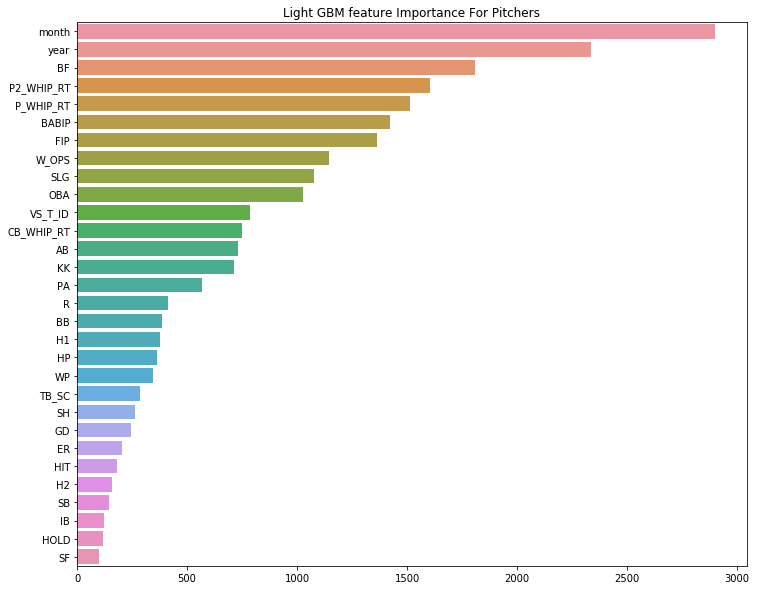

In [202]:
plt.figure(figsize=(12,10))
plt.title("Light GBM feature Importance For Pitchers")
sns.barplot(x=lgb_feature_imp[0:30], y=lgb_feature_imp.index[0:30])

In [203]:
train=df_all_LG.iloc[:200]
valid=df_all_LG.iloc[200:300]
test=df_all_LG.iloc[300:]

X_train,y_train=train.drop(['y_next'],axis=1),train['y_next']
X_valid,y_valid=valid.drop(['y_next'],axis=1),valid['y_next']
X_test,y_test=test.drop(['y_next'],axis=1),test['y_next']

In [213]:
model = LGBMRegressor()
model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)],
             eval_metric='mae')

[1]	training's l1: 0.674399	training's l2: 0.818302	valid_1's l1: 0.631935	valid_1's l2: 0.677739
[2]	training's l1: 0.62572	training's l2: 0.72036	valid_1's l1: 0.626784	valid_1's l2: 0.728713
[3]	training's l1: 0.58191	training's l2: 0.641027	valid_1's l1: 0.641264	valid_1's l2: 0.782607
[4]	training's l1: 0.539227	training's l2: 0.576734	valid_1's l1: 0.651126	valid_1's l2: 0.813859
[5]	training's l1: 0.503587	training's l2: 0.524236	valid_1's l1: 0.671665	valid_1's l2: 0.868239
[6]	training's l1: 0.472681	training's l2: 0.481286	valid_1's l1: 0.688641	valid_1's l2: 0.90804
[7]	training's l1: 0.445198	training's l2: 0.446166	valid_1's l1: 0.709534	valid_1's l2: 0.957981
[8]	training's l1: 0.418841	training's l2: 0.417323	valid_1's l1: 0.729639	valid_1's l2: 1.00677
[9]	training's l1: 0.396195	training's l2: 0.393474	valid_1's l1: 0.741117	valid_1's l2: 1.03894
[10]	training's l1: 0.371703	training's l2: 0.373837	valid_1's l1: 0.755842	valid_1's l2: 1.06043
[11]	training's l1: 0.3536

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [232]:
params={
    'lambda_l1': 1.5,
    #'boosting_type':'gbdt',
    'lambda_l2': 0,
    'min_data_in_leaf': 30,
    'num_leaves': 30,
    'reg_alpha': 0.1
}
model = LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split',
                                     learning_rate=0.01, max_depth=-1,
                                     min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     num_boost_round=2000, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0)
model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)],
             eval_metric='mae')

[1]	training's l1: 0.723077	training's l2: 0.926553	valid_1's l1: 0.637085	valid_1's l2: 0.636143
[2]	training's l1: 0.717722	training's l2: 0.914141	valid_1's l1: 0.636519	valid_1's l2: 0.64026
[3]	training's l1: 0.712421	training's l2: 0.901976	valid_1's l1: 0.635958	valid_1's l2: 0.644447
[4]	training's l1: 0.707173	training's l2: 0.890053	valid_1's l1: 0.635402	valid_1's l2: 0.648702
[5]	training's l1: 0.701978	training's l2: 0.878367	valid_1's l1: 0.634853	valid_1's l2: 0.653021
[6]	training's l1: 0.696834	training's l2: 0.866913	valid_1's l1: 0.634308	valid_1's l2: 0.657403
[7]	training's l1: 0.691742	training's l2: 0.855688	valid_1's l1: 0.63377	valid_1's l2: 0.661844
[8]	training's l1: 0.686701	training's l2: 0.844686	valid_1's l1: 0.633236	valid_1's l2: 0.666341
[9]	training's l1: 0.68171	training's l2: 0.833902	valid_1's l1: 0.632708	valid_1's l2: 0.670893
[10]	training's l1: 0.676769	training's l2: 0.823334	valid_1's l1: 0.632185	valid_1's l2: 0.675497
[11]	training's l1: 0.

[161]	training's l1: 0.290862	training's l2: 0.312307	valid_1's l1: 0.807852	valid_1's l2: 1.21475
[162]	training's l1: 0.289477	training's l2: 0.311645	valid_1's l1: 0.808582	valid_1's l2: 1.21552
[163]	training's l1: 0.288489	training's l2: 0.310993	valid_1's l1: 0.809378	valid_1's l2: 1.21816
[164]	training's l1: 0.287374	training's l2: 0.310351	valid_1's l1: 0.810245	valid_1's l2: 1.22089
[165]	training's l1: 0.286375	training's l2: 0.309718	valid_1's l1: 0.810533	valid_1's l2: 1.22222
[166]	training's l1: 0.285417	training's l2: 0.309095	valid_1's l1: 0.811306	valid_1's l2: 1.2248
[167]	training's l1: 0.284437	training's l2: 0.308482	valid_1's l1: 0.811581	valid_1's l2: 1.2261
[168]	training's l1: 0.283361	training's l2: 0.307877	valid_1's l1: 0.812417	valid_1's l2: 1.22875
[169]	training's l1: 0.282047	training's l2: 0.307281	valid_1's l1: 0.813094	valid_1's l2: 1.22941
[170]	training's l1: 0.281126	training's l2: 0.306694	valid_1's l1: 0.813837	valid_1's l2: 1.23192
[171]	traini

[285]	training's l1: 0.212277	training's l2: 0.246197	valid_1's l1: 0.859679	valid_1's l2: 1.35251
[286]	training's l1: 0.211747	training's l2: 0.245915	valid_1's l1: 0.859645	valid_1's l2: 1.35118
[287]	training's l1: 0.211808	training's l2: 0.245506	valid_1's l1: 0.859465	valid_1's l2: 1.35096
[288]	training's l1: 0.211301	training's l2: 0.245005	valid_1's l1: 0.860312	valid_1's l2: 1.35338
[289]	training's l1: 0.210763	training's l2: 0.244729	valid_1's l1: 0.860275	valid_1's l2: 1.35206
[290]	training's l1: 0.210634	training's l2: 0.244325	valid_1's l1: 0.860398	valid_1's l2: 1.35234
[291]	training's l1: 0.210103	training's l2: 0.244055	valid_1's l1: 0.860361	valid_1's l2: 1.35103
[292]	training's l1: 0.209605	training's l2: 0.243567	valid_1's l1: 0.861193	valid_1's l2: 1.35343
[293]	training's l1: 0.209671	training's l2: 0.243216	valid_1's l1: 0.860966	valid_1's l2: 1.3529
[294]	training's l1: 0.209171	training's l2: 0.242953	valid_1's l1: 0.860928	valid_1's l2: 1.35161
[295]	train

[430]	training's l1: 0.184833	training's l2: 0.196346	valid_1's l1: 0.866286	valid_1's l2: 1.36386
[431]	training's l1: 0.18487	training's l2: 0.196047	valid_1's l1: 0.866226	valid_1's l2: 1.36358
[432]	training's l1: 0.184884	training's l2: 0.195752	valid_1's l1: 0.866055	valid_1's l2: 1.36342
[433]	training's l1: 0.184748	training's l2: 0.195361	valid_1's l1: 0.865609	valid_1's l2: 1.36262
[434]	training's l1: 0.18448	training's l2: 0.19491	valid_1's l1: 0.865452	valid_1's l2: 1.36237
[435]	training's l1: 0.184368	training's l2: 0.194751	valid_1's l1: 0.865806	valid_1's l2: 1.36354
[436]	training's l1: 0.184133	training's l2: 0.194309	valid_1's l1: 0.865649	valid_1's l2: 1.36329
[437]	training's l1: 0.184016	training's l2: 0.194152	valid_1's l1: 0.866001	valid_1's l2: 1.36447
[438]	training's l1: 0.183851	training's l2: 0.19388	valid_1's l1: 0.866377	valid_1's l2: 1.36578
[439]	training's l1: 0.183634	training's l2: 0.193755	valid_1's l1: 0.866323	valid_1's l2: 1.36483
[440]	training

[515]	training's l1: 0.176412	training's l2: 0.175153	valid_1's l1: 0.868224	valid_1's l2: 1.38335
[516]	training's l1: 0.176296	training's l2: 0.174819	valid_1's l1: 0.868045	valid_1's l2: 1.38309
[517]	training's l1: 0.176148	training's l2: 0.174588	valid_1's l1: 0.868411	valid_1's l2: 1.38437
[518]	training's l1: 0.175957	training's l2: 0.174483	valid_1's l1: 0.868399	valid_1's l2: 1.3835
[519]	training's l1: 0.175777	training's l2: 0.174256	valid_1's l1: 0.868916	valid_1's l2: 1.38532
[520]	training's l1: 0.175657	training's l2: 0.17394	valid_1's l1: 0.868514	valid_1's l2: 1.38466
[521]	training's l1: 0.175647	training's l2: 0.173767	valid_1's l1: 0.868351	valid_1's l2: 1.38391
[522]	training's l1: 0.175607	training's l2: 0.173533	valid_1's l1: 0.868231	valid_1's l2: 1.38402
[523]	training's l1: 0.1753	training's l2: 0.173056	valid_1's l1: 0.868681	valid_1's l2: 1.38579
[524]	training's l1: 0.175293	training's l2: 0.172886	valid_1's l1: 0.868519	valid_1's l2: 1.38505
[525]	training

[630]	training's l1: 0.167376	training's l2: 0.151377	valid_1's l1: 0.870205	valid_1's l2: 1.40282
[631]	training's l1: 0.167266	training's l2: 0.15119	valid_1's l1: 0.870544	valid_1's l2: 1.40398
[632]	training's l1: 0.167024	training's l2: 0.150907	valid_1's l1: 0.870575	valid_1's l2: 1.40378
[633]	training's l1: 0.167044	training's l2: 0.150671	valid_1's l1: 0.870458	valid_1's l2: 1.40324
[634]	training's l1: 0.166924	training's l2: 0.150413	valid_1's l1: 0.870938	valid_1's l2: 1.40471
[635]	training's l1: 0.166813	training's l2: 0.150137	valid_1's l1: 0.870824	valid_1's l2: 1.40466
[636]	training's l1: 0.166654	training's l2: 0.149953	valid_1's l1: 0.871299	valid_1's l2: 1.40635
[637]	training's l1: 0.166583	training's l2: 0.149668	valid_1's l1: 0.871411	valid_1's l2: 1.40681
[638]	training's l1: 0.166489	training's l2: 0.149486	valid_1's l1: 0.87174	valid_1's l2: 1.40797
[639]	training's l1: 0.16645	training's l2: 0.149394	valid_1's l1: 0.87152	valid_1's l2: 1.4074
[640]	training'

[739]	training's l1: 0.161351	training's l2: 0.130978	valid_1's l1: 0.873407	valid_1's l2: 1.42674
[740]	training's l1: 0.161338	training's l2: 0.130783	valid_1's l1: 0.873216	valid_1's l2: 1.42655
[741]	training's l1: 0.1613	training's l2: 0.130709	valid_1's l1: 0.872989	valid_1's l2: 1.42574
[742]	training's l1: 0.161254	training's l2: 0.130542	valid_1's l1: 0.872848	valid_1's l2: 1.42589
[743]	training's l1: 0.161217	training's l2: 0.13047	valid_1's l1: 0.87262	valid_1's l2: 1.42509
[744]	training's l1: 0.161091	training's l2: 0.130264	valid_1's l1: 0.872966	valid_1's l2: 1.42627
[745]	training's l1: 0.161056	training's l2: 0.13014	valid_1's l1: 0.872957	valid_1's l2: 1.42657
[746]	training's l1: 0.160982	training's l2: 0.129935	valid_1's l1: 0.872833	valid_1's l2: 1.42657
[747]	training's l1: 0.16084	training's l2: 0.129778	valid_1's l1: 0.87327	valid_1's l2: 1.42813
[748]	training's l1: 0.160812	training's l2: 0.129671	valid_1's l1: 0.873308	valid_1's l2: 1.42798
[749]	training's 

[835]	training's l1: 0.155189	training's l2: 0.116673	valid_1's l1: 0.874926	valid_1's l2: 1.44401
[836]	training's l1: 0.155081	training's l2: 0.116598	valid_1's l1: 0.875152	valid_1's l2: 1.44495
[837]	training's l1: 0.155099	training's l2: 0.116494	valid_1's l1: 0.874942	valid_1's l2: 1.44406
[838]	training's l1: 0.155016	training's l2: 0.116327	valid_1's l1: 0.874924	valid_1's l2: 1.44411
[839]	training's l1: 0.154896	training's l2: 0.11625	valid_1's l1: 0.875116	valid_1's l2: 1.44499
[840]	training's l1: 0.154834	training's l2: 0.116075	valid_1's l1: 0.87502	valid_1's l2: 1.44478
[841]	training's l1: 0.154743	training's l2: 0.115906	valid_1's l1: 0.875285	valid_1's l2: 1.4458
[842]	training's l1: 0.154761	training's l2: 0.115751	valid_1's l1: 0.87499	valid_1's l2: 1.44472
[843]	training's l1: 0.154716	training's l2: 0.115676	valid_1's l1: 0.87492	valid_1's l2: 1.44485
[844]	training's l1: 0.154686	training's l2: 0.115508	valid_1's l1: 0.874631	valid_1's l2: 1.44424
[845]	training'

[969]	training's l1: 0.146108	training's l2: 0.0997136	valid_1's l1: 0.877554	valid_1's l2: 1.46376
[970]	training's l1: 0.145946	training's l2: 0.099647	valid_1's l1: 0.877773	valid_1's l2: 1.46462
[971]	training's l1: 0.145948	training's l2: 0.0995666	valid_1's l1: 0.877588	valid_1's l2: 1.46385
[972]	training's l1: 0.145902	training's l2: 0.0994291	valid_1's l1: 0.877557	valid_1's l2: 1.4637
[973]	training's l1: 0.145924	training's l2: 0.0992814	valid_1's l1: 0.877499	valid_1's l2: 1.46373
[974]	training's l1: 0.145784	training's l2: 0.0992161	valid_1's l1: 0.877714	valid_1's l2: 1.46458
[975]	training's l1: 0.145645	training's l2: 0.0991313	valid_1's l1: 0.877854	valid_1's l2: 1.46492
[976]	training's l1: 0.145519	training's l2: 0.099017	valid_1's l1: 0.878217	valid_1's l2: 1.46626
[977]	training's l1: 0.145425	training's l2: 0.0988837	valid_1's l1: 0.878704	valid_1's l2: 1.46757
[978]	training's l1: 0.145286	training's l2: 0.0986981	valid_1's l1: 0.878686	valid_1's l2: 1.46763
[97

[1123]	training's l1: 0.135274	training's l2: 0.0837451	valid_1's l1: 0.88248	valid_1's l2: 1.4856
[1124]	training's l1: 0.135183	training's l2: 0.0836555	valid_1's l1: 0.882785	valid_1's l2: 1.48679
[1125]	training's l1: 0.135176	training's l2: 0.0835933	valid_1's l1: 0.882613	valid_1's l2: 1.48609
[1126]	training's l1: 0.135224	training's l2: 0.0834715	valid_1's l1: 0.882555	valid_1's l2: 1.48639
[1127]	training's l1: 0.135134	training's l2: 0.0833833	valid_1's l1: 0.882859	valid_1's l2: 1.48757
[1128]	training's l1: 0.135123	training's l2: 0.0833219	valid_1's l1: 0.882709	valid_1's l2: 1.48695
[1129]	training's l1: 0.135082	training's l2: 0.0832587	valid_1's l1: 0.882941	valid_1's l2: 1.48793
[1130]	training's l1: 0.135036	training's l2: 0.0831528	valid_1's l1: 0.882882	valid_1's l2: 1.48792
[1131]	training's l1: 0.13496	training's l2: 0.0830656	valid_1's l1: 0.883077	valid_1's l2: 1.48872
[1132]	training's l1: 0.135007	training's l2: 0.082946	valid_1's l1: 0.883019	valid_1's l2: 1.

[1216]	training's l1: 0.130256	training's l2: 0.0761903	valid_1's l1: 0.884612	valid_1's l2: 1.4958
[1217]	training's l1: 0.130209	training's l2: 0.076101	valid_1's l1: 0.884785	valid_1's l2: 1.49649
[1218]	training's l1: 0.130122	training's l2: 0.0759819	valid_1's l1: 0.884704	valid_1's l2: 1.49653
[1219]	training's l1: 0.1301	training's l2: 0.0758829	valid_1's l1: 0.88458	valid_1's l2: 1.49635
[1220]	training's l1: 0.130067	training's l2: 0.0758196	valid_1's l1: 0.884523	valid_1's l2: 1.49624
[1221]	training's l1: 0.129936	training's l2: 0.0756802	valid_1's l1: 0.884622	valid_1's l2: 1.49663
[1222]	training's l1: 0.129862	training's l2: 0.075558	valid_1's l1: 0.884597	valid_1's l2: 1.49656
[1223]	training's l1: 0.129827	training's l2: 0.0755018	valid_1's l1: 0.884813	valid_1's l2: 1.49748
[1224]	training's l1: 0.129755	training's l2: 0.0754489	valid_1's l1: 0.885012	valid_1's l2: 1.4982
[1225]	training's l1: 0.129653	training's l2: 0.0753893	valid_1's l1: 0.884948	valid_1's l2: 1.497

[1338]	training's l1: 0.123349	training's l2: 0.0670952	valid_1's l1: 0.887934	valid_1's l2: 1.50912
[1339]	training's l1: 0.123307	training's l2: 0.0670025	valid_1's l1: 0.887986	valid_1's l2: 1.50929
[1340]	training's l1: 0.123212	training's l2: 0.0669	valid_1's l1: 0.887931	valid_1's l2: 1.50922
[1341]	training's l1: 0.123203	training's l2: 0.0668527	valid_1's l1: 0.888133	valid_1's l2: 1.51009
[1342]	training's l1: 0.123162	training's l2: 0.0668092	valid_1's l1: 0.888323	valid_1's l2: 1.51076
[1343]	training's l1: 0.123085	training's l2: 0.0667601	valid_1's l1: 0.888283	valid_1's l2: 1.51043
[1344]	training's l1: 0.122988	training's l2: 0.0666699	valid_1's l1: 0.888092	valid_1's l2: 1.50987
[1345]	training's l1: 0.122913	training's l2: 0.0666245	valid_1's l1: 0.888301	valid_1's l2: 1.51066
[1346]	training's l1: 0.122869	training's l2: 0.0665455	valid_1's l1: 0.888251	valid_1's l2: 1.51061
[1347]	training's l1: 0.122839	training's l2: 0.066467	valid_1's l1: 0.888245	valid_1's l2: 1.

[1455]	training's l1: 0.11742	training's l2: 0.0600376	valid_1's l1: 0.89189	valid_1's l2: 1.52407
[1456]	training's l1: 0.117408	training's l2: 0.0599622	valid_1's l1: 0.89184	valid_1's l2: 1.52412
[1457]	training's l1: 0.117343	training's l2: 0.0599036	valid_1's l1: 0.892089	valid_1's l2: 1.52509
[1458]	training's l1: 0.117266	training's l2: 0.0598637	valid_1's l1: 0.892046	valid_1's l2: 1.5248
[1459]	training's l1: 0.11727	training's l2: 0.0597961	valid_1's l1: 0.892034	valid_1's l2: 1.52479
[1460]	training's l1: 0.117252	training's l2: 0.059712	valid_1's l1: 0.892091	valid_1's l2: 1.52485
[1461]	training's l1: 0.117206	training's l2: 0.0596345	valid_1's l1: 0.89214	valid_1's l2: 1.52497
[1462]	training's l1: 0.117159	training's l2: 0.0595896	valid_1's l1: 0.892393	valid_1's l2: 1.52582
[1463]	training's l1: 0.117117	training's l2: 0.0595533	valid_1's l1: 0.892551	valid_1's l2: 1.52644
[1464]	training's l1: 0.117052	training's l2: 0.0595143	valid_1's l1: 0.892506	valid_1's l2: 1.526

[1596]	training's l1: 0.111517	training's l2: 0.0520826	valid_1's l1: 0.898604	valid_1's l2: 1.54929
[1597]	training's l1: 0.111409	training's l2: 0.0520597	valid_1's l1: 0.89859	valid_1's l2: 1.54886
[1598]	training's l1: 0.111363	training's l2: 0.0519838	valid_1's l1: 0.898481	valid_1's l2: 1.54858
[1599]	training's l1: 0.111333	training's l2: 0.05196	valid_1's l1: 0.898371	valid_1's l2: 1.54826
[1600]	training's l1: 0.111318	training's l2: 0.0519092	valid_1's l1: 0.898384	valid_1's l2: 1.5483
[1601]	training's l1: 0.111237	training's l2: 0.0518103	valid_1's l1: 0.898621	valid_1's l2: 1.54892
[1602]	training's l1: 0.11121	training's l2: 0.0517548	valid_1's l1: 0.898468	valid_1's l2: 1.54866
[1603]	training's l1: 0.111168	training's l2: 0.0516794	valid_1's l1: 0.898443	valid_1's l2: 1.54876
[1604]	training's l1: 0.111101	training's l2: 0.0516177	valid_1's l1: 0.898737	valid_1's l2: 1.54958
[1605]	training's l1: 0.111074	training's l2: 0.0515629	valid_1's l1: 0.898585	valid_1's l2: 1.5

[1687]	training's l1: 0.107726	training's l2: 0.0472698	valid_1's l1: 0.901676	valid_1's l2: 1.56296
[1688]	training's l1: 0.10773	training's l2: 0.0472235	valid_1's l1: 0.901763	valid_1's l2: 1.56307
[1689]	training's l1: 0.107677	training's l2: 0.0471668	valid_1's l1: 0.901747	valid_1's l2: 1.56317
[1690]	training's l1: 0.107615	training's l2: 0.0470876	valid_1's l1: 0.90193	valid_1's l2: 1.56351
[1691]	training's l1: 0.107589	training's l2: 0.0470445	valid_1's l1: 0.901915	valid_1's l2: 1.5636
[1692]	training's l1: 0.10753	training's l2: 0.0470007	valid_1's l1: 0.902175	valid_1's l2: 1.56448
[1693]	training's l1: 0.107474	training's l2: 0.046938	valid_1's l1: 0.902099	valid_1's l2: 1.56424
[1694]	training's l1: 0.107434	training's l2: 0.046872	valid_1's l1: 0.902044	valid_1's l2: 1.56411
[1695]	training's l1: 0.107395	training's l2: 0.046804	valid_1's l1: 0.902083	valid_1's l2: 1.56426
[1696]	training's l1: 0.107345	training's l2: 0.0467332	valid_1's l1: 0.901997	valid_1's l2: 1.564

[1772]	training's l1: 0.103948	training's l2: 0.0427414	valid_1's l1: 0.905166	valid_1's l2: 1.5775
[1773]	training's l1: 0.103918	training's l2: 0.0426878	valid_1's l1: 0.905159	valid_1's l2: 1.57764
[1774]	training's l1: 0.103851	training's l2: 0.0426522	valid_1's l1: 0.905141	valid_1's l2: 1.57753
[1775]	training's l1: 0.103841	training's l2: 0.0425977	valid_1's l1: 0.905227	valid_1's l2: 1.57782
[1776]	training's l1: 0.103745	training's l2: 0.04256	valid_1's l1: 0.905207	valid_1's l2: 1.57768
[1777]	training's l1: 0.103703	training's l2: 0.0424985	valid_1's l1: 0.904969	valid_1's l2: 1.57719
[1778]	training's l1: 0.103645	training's l2: 0.04245	valid_1's l1: 0.905091	valid_1's l2: 1.5777
[1779]	training's l1: 0.10359	training's l2: 0.0423815	valid_1's l1: 0.905263	valid_1's l2: 1.57803
[1780]	training's l1: 0.103552	training's l2: 0.0423531	valid_1's l1: 0.905463	valid_1's l2: 1.57865
[1781]	training's l1: 0.10356	training's l2: 0.0423107	valid_1's l1: 0.905364	valid_1's l2: 1.5786

[1901]	training's l1: 0.0985659	training's l2: 0.0373412	valid_1's l1: 0.910032	valid_1's l2: 1.59909
[1902]	training's l1: 0.0985253	training's l2: 0.0373081	valid_1's l1: 0.910008	valid_1's l2: 1.59915
[1903]	training's l1: 0.0984373	training's l2: 0.0372596	valid_1's l1: 0.910157	valid_1's l2: 1.59948
[1904]	training's l1: 0.0984289	training's l2: 0.0372256	valid_1's l1: 0.910025	valid_1's l2: 1.59928
[1905]	training's l1: 0.0983828	training's l2: 0.0371891	valid_1's l1: 0.91007	valid_1's l2: 1.59932
[1906]	training's l1: 0.0983509	training's l2: 0.0371625	valid_1's l1: 0.910197	valid_1's l2: 1.59989
[1907]	training's l1: 0.0983145	training's l2: 0.0371389	valid_1's l1: 0.91022	valid_1's l2: 1.60028
[1908]	training's l1: 0.0983264	training's l2: 0.0371043	valid_1's l1: 0.910296	valid_1's l2: 1.60038
[1909]	training's l1: 0.0982724	training's l2: 0.0370546	valid_1's l1: 0.910365	valid_1's l2: 1.60076
[1910]	training's l1: 0.0981948	training's l2: 0.0369969	valid_1's l1: 0.910397	vali

[1984]	training's l1: 0.0954264	training's l2: 0.0344327	valid_1's l1: 0.912894	valid_1's l2: 1.60971
[1985]	training's l1: 0.0954014	training's l2: 0.0343948	valid_1's l1: 0.912996	valid_1's l2: 1.61015
[1986]	training's l1: 0.0953676	training's l2: 0.0343502	valid_1's l1: 0.912966	valid_1's l2: 1.61029
[1987]	training's l1: 0.0953444	training's l2: 0.0343168	valid_1's l1: 0.913001	valid_1's l2: 1.6104
[1988]	training's l1: 0.095299	training's l2: 0.034282	valid_1's l1: 0.913003	valid_1's l2: 1.61046
[1989]	training's l1: 0.0952643	training's l2: 0.0342369	valid_1's l1: 0.91296	valid_1's l2: 1.61035
[1990]	training's l1: 0.095244	training's l2: 0.0342011	valid_1's l1: 0.912983	valid_1's l2: 1.61043
[1991]	training's l1: 0.095175	training's l2: 0.0341598	valid_1's l1: 0.91289	valid_1's l2: 1.61034
[1992]	training's l1: 0.0951347	training's l2: 0.0341047	valid_1's l1: 0.913082	valid_1's l2: 1.61088
[1993]	training's l1: 0.0951083	training's l2: 0.0340606	valid_1's l1: 0.91304	valid_1's 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_boost_round=2000, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)